In [2]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('JRC_dataset_text.xlsx', sheet_name='Catania floods')
df

,full_text
0,Los gansos de Palermo. https://t.co/hN0WwJp67W
1,"Maltempo. In arrivo ciclone Mediterraneo, prim..."
2,"Maltempo, nubifragio a Pantelleria. Danni e di..."
3,"Maltempo: Protezione Civile, in Sicilia è 'all..."
4,"Maltempo in Sicilia, ancora dispersa la coppia..."
...,...
201,Severe flooding in Catania Italy. \nHeavy rain...
202,¿Podrán los de Palermo? https://t.co/jNilqBnyDY
203,"Siracusa, mareggiata e vento: ciclone al largo..."
204,Allerta meteo Catania: l’incredibile bomba d’a...


In [4]:
# Import required library
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Show language distribution
language_counts = df['language'].value_counts()
print("Language distribution in the dataset:")
print(language_counts)

Language distribution in the dataset:
language
it         126
en          22
sw          19
es          11
pt           4
tl           3
ar           3
unknown      3
ca           3
tr           2
nl           2
pl           1
sl           1
el           1
fr           1
hu           1
zh-tw        1
de           1
sq           1
Name: count, dtype: int64


Jumlah bahasa unik yang ada: 19


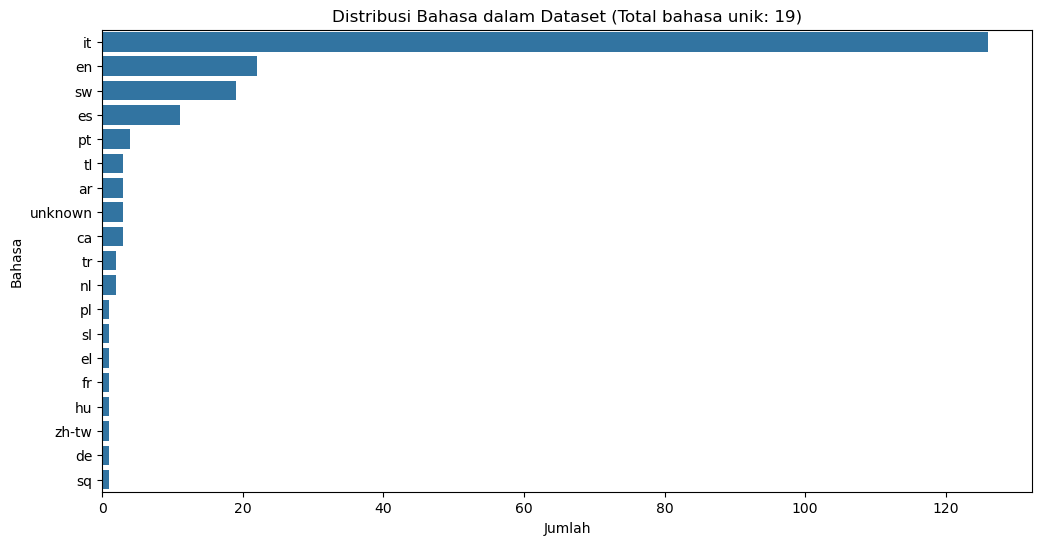

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

# Menghitung jumlah bahasa unik
unique_languages_count = df['language'].nunique()
print(f"Jumlah bahasa unik yang ada: {unique_languages_count}")

# Menampilkan jumlah bahasa unik dalam plot
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, order=language_counts.index)
plt.title(f'Distribusi Bahasa dalam Dataset (Total bahasa unik: {unique_languages_count})')
plt.xlabel('Jumlah')
plt.ylabel('Bahasa')
plt.show()

In [6]:
# Import libraries
from langdetect import detect
from deep_translator import GoogleTranslator
import pandas as pd

# Function to translate text to English
def translate_to_english(text, source_lang):
    try:
        # If the text is already in English, return it as-is
        if source_lang == 'en':
            return text
        # Translate text to English
        translator = GoogleTranslator(source=source_lang, target='en')
        return translator.translate(text)
    except:
        return 'Translation error'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Translate all non-English texts to English
df['english_translation'] = df.apply(
    lambda row: translate_to_english(row['full_text'], row['language']),
    axis=1
)

# View result: displaying the first few rows
print(df[['full_text', 'language', 'english_translation']].head())


                                           full_text language  \
0     Los gansos de Palermo. https://t.co/hN0WwJp67W       pt   
1  Maltempo. In arrivo ciclone Mediterraneo, prim...       it   
2  Maltempo, nubifragio a Pantelleria. Danni e di...       it   
3  Maltempo: Protezione Civile, in Sicilia è 'all...       it   
4  Maltempo in Sicilia, ancora dispersa la coppia...       it   

                                 english_translation  
0      Los geese of Palermo. https://t.co/hN0WwJp67W  
1  Bad weather. Mediterranean cyclone on the way,...  
2  Bad weather, downpour in Pantelleria. Damage a...  
3  Bad Weather: Civil Protection, in Sicily it's ...  
4  Bad weather in Sicily, the couple swept away b...  


In [7]:
# Remove rows with 'Translation error' in english_translation column
df = df[df['english_translation'] != 'Translation error']

# Verify results
print(f"Number of rows after removing translation errors: {len(df)}")

Number of rows after removing translation errors: 202


In [8]:
df

,full_text,language,english_translation
0,Los gansos de Palermo. https://t.co/hN0WwJp67W,pt,Los geese of Palermo. https://t.co/hN0WwJp67W
1,"Maltempo. In arrivo ciclone Mediterraneo, prim...",it,"Bad weather. Mediterranean cyclone on the way,..."
2,"Maltempo, nubifragio a Pantelleria. Danni e di...",it,"Bad weather, downpour in Pantelleria. Damage a..."
3,"Maltempo: Protezione Civile, in Sicilia è 'all...",it,"Bad Weather: Civil Protection, in Sicily it's ..."
4,"Maltempo in Sicilia, ancora dispersa la coppia...",it,"Bad weather in Sicily, the couple swept away b..."
...,...,...,...
201,Severe flooding in Catania Italy. \nHeavy rain...,en,Severe flooding in Catania Italy. \nHeavy rain...
202,¿Podrán los de Palermo? https://t.co/jNilqBnyDY,es,Can Palermo do it? https://t.co/jNilqBnyDY
203,"Siracusa, mareggiata e vento: ciclone al largo...",it,"Syracuse, storm surge and wind: cyclone off th..."
204,Allerta meteo Catania: l’incredibile bomba d’a...,it,Catania Weather Alert: The Incredible Water Bo...


In [9]:
languages_found = language_counts.index.tolist()
print("Bahasa yang ditemukan dalam dataset:")
print(languages_found)

Bahasa yang ditemukan dalam dataset:
['it', 'en', 'sw', 'es', 'pt', 'tl', 'ar', 'unknown', 'ca', 'tr', 'nl', 'pl', 'sl', 'el', 'fr', 'hu', 'zh-tw', 'de', 'sq']


In [10]:
# Drop 'full_text' and 'language' columns
df = df.drop(['full_text', 'language'], axis=1)

# Display the updated dataframe
df.head()

,english_translation
0,Los geese of Palermo. https://t.co/hN0WwJp67W
1,"Bad weather. Mediterranean cyclone on the way,..."
2,"Bad weather, downpour in Pantelleria. Damage a..."
3,"Bad Weather: Civil Protection, in Sicily it's ..."
4,"Bad weather in Sicily, the couple swept away b..."


In [11]:
# Save the dataframe to an Excel file
df.to_excel('catania_english_dataset.xlsx', index=False)

print("Dataframe has been saved to 'catania_english_dataset.xlsx'")

Dataframe has been saved to 'catania_english_dataset.xlsx'
